In [2]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

words = open('/Users/mli/Documents/Projects/karpathy/makemore-master/names.txt', 'r').read().splitlines()
words[:10]

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos


{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [3]:
# create training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [4]:
xs

tensor([ 0,  5, 13, 13,  1])

In [5]:
ys

tensor([ 5, 13, 13,  1,  0])

In [6]:
import torch.nn.functional as F 
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

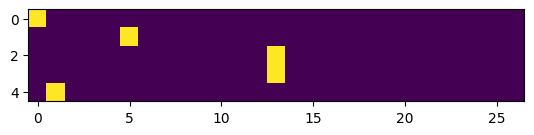

In [7]:
plt.imshow(xenc)

In [8]:
W = torch.randn((27,1))
xenc @ W
# 5, 27 @ 27, 1 -> 5, 1

tensor([[-0.0165],
        [-1.0494],
        [ 0.1266],
        [ 0.1266],
        [-0.7561]])

In [9]:
g = torch.Generator().manual_seed(2147483647)

W = torch.randn((27,27), generator=g)
xenc @ W
# 5, 27 @ 27, 27 -> 5, 27
# xenc[1] @ W[:,0]

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9644e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2844e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4040e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0731e-02,
          2.4968e+00,  2.4448e+00],
        [ 4.7236e-01,  1.4830e+00,  3.1748e-01,  1.0588e+00,  2.3982e+00,
          4.6827e-01, -6.5650e-01,  6.1662e-01, -6.2198e-01,  5.1007e-01,
          1.3563e+00,  2.3445e-01, -4.5585e-01, -1.3132e-03, -5.1161e-01,
          5.5570e-01,  4.7458e-01, -1.3867e+00,  1.6229e+00,  1.7197e-01,
          9.8846e-01,  5.0657e-01,  1.0198e+00, -1.9062e+00, -4.2753e-01,
         -2.1259e+00,  9.6041e-01],
        [ 1.9359e-01,  1.0532e+00,  6.3393e-01,  2.5786e-01,  9.6408e-01,
         -2.4855e-01,  2.4756e-02, -3.0404e-02,  1.5622e+00, -4.4852e-01,
         -1.2345e+00,  1.1220e+00, -6.73

In [10]:
logits = (xenc @ W)
# exponentiating to make all positive, interpret as counts
# softmax
counts = logits.exp()
probs = counts / counts.sum(1,keepdims=True)

In [11]:
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [12]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    p = probs[i,y]
    logp = torch.log(p)
    nll = -logp 
    nlls[i] = nll
nll_avg = nlls.mean().item()
nll_avg

3.7693049907684326

In [13]:
nlls

tensor([4.3993, 4.0146, 3.6234, 2.6081, 4.2012])

In [14]:
# full scale

xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad = True)

xenc = F.one_hot(xs, num_classes=27).float()
logits = (xenc @ W)
counts = logits.exp()
probs = counts / counts.sum(1,keepdims=True)

# iterative
# loss = torch.tensor([-torch.log(probs[i,y.item()]) for i,y in enumerate(ys)])
# loss.mean().item()

# vectorized, way faster
loss = -probs[torch.arange(xs.shape[0]), ys].log().mean()
loss


tensor(3.7590, grad_fn=<NegBackward0>)

In [ ]:
step = 1
xenc = F.one_hot(xs, num_classes=27).float()

for i in range(1000):
    # forward pass
    logits = (xenc @ W)
    counts = logits.exp()
    probs = counts / counts.sum(1,keepdims=True)
    loss = -probs[torch.arange(xs.shape[0]), ys].log().mean()
    # can add regularization factor to loss for model smoothing
    # as a function of W like + 0.01*(W**2).mean()

    # backward pass
    W.grad = None # set to zero
    loss.backward()
    
    # gradient descent
    W.data -= W.grad*step
    
    print(i, 'loss ', loss.data.item())

# approaches same loss as freq based approach, no add'l info


0 loss  2.4622905254364014
1 loss  2.462289571762085
2 loss  2.4622883796691895
3 loss  2.4622879028320312
4 loss  2.4622867107391357
5 loss  2.4622857570648193
6 loss  2.462284803390503
7 loss  2.4622840881347656
8 loss  2.46228289604187
9 loss  2.462282180786133
10 loss  2.4622812271118164
11 loss  2.4622802734375
12 loss  2.4622795581817627
13 loss  2.462278366088867
14 loss  2.462277412414551
15 loss  2.4622766971588135
16 loss  2.462275743484497
17 loss  2.4622747898101807
18 loss  2.4622738361358643
19 loss  2.462273120880127
20 loss  2.4622719287872314
21 loss  2.462271213531494
22 loss  2.4622700214385986
23 loss  2.4622693061828613
24 loss  2.462268114089966
25 loss  2.4622673988342285
26 loss  2.462266445159912
27 loss  2.4622654914855957
28 loss  2.4622647762298584
29 loss  2.462263822555542
30 loss  2.4622626304626465
31 loss  2.462261438369751
32 loss  2.4622609615325928
33 loss  2.4622600078582764
34 loss  2.46225905418396
35 loss  2.4622581005096436
36 loss  2.4622571468

In [ ]:
# g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    string = ''
    ix = 0
    
    while True:
        p = probs[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        string += itos[ix]
    print(string)

dniealbejtuasrhniaekbaaleteanieekna
aytealciifrhyj
knx
khnecb
kdvehejna
kayculpnesrytrecebiekz
aldvalciiiemyybarhem
shnalhanas
shsnaa
rysryknozu
